# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]
counter=0
set = 1
base_url = "http://api.openweathermap.org/data/2.5/weather?"


print(f'Beginning Data Retrieval')
print(f'-----------------------------')


for city in cities:
    counter+=1
    if counter == 51:
        counter = 1
        set = set + 1
        time.sleep(60)
    print(f'Processing Record {counter} of Set {set} | {city}')
    
    try:
        query = f'{base_url}appid={weather_api_key}&units=imperial&q={city}'
        response=requests.get(query).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        windspeed.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
        date.append(np.nan)
print("-----------------------------")
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | orbetello
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | cozumel
Processing Record 4 of Set 1 | yibin
Processing Record 5 of Set 1 | karaul
City not found. Skipping...
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | novoilinsk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | doha
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | kumbo
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | volno-nadezhdinskoye
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | foix
Processing Record 22 of Set 1 | mabaruma
Processing Record 2

Processing Record 40 of Set 4 | ebbw vale
Processing Record 41 of Set 4 | mersing
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | buchanan
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | suna
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | evensk
Processing Record 1 of Set 5 | maghama
City not found. Skipping...
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | barhi
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | khunti
Processing Record 9 of Set 5 | kenai
Processing Record 10 of Set 5 | raga
Processing Record 11 of Set 5 | carora
Processing Record 12 of Set 5 | mergui
City not found. Skipping

Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | yumen
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | haibowan
City not found. Skipping...
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | palmer
Processing Record 33 of Set 8 | kinna
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | naryan-mar
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | fraga
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | galle
Processing Record 40 of Set 8 | uray
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | dodge city
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | jumla
Processing Record 45 of Set 8 | machico
Processing Record 46 of Set 8 | bac can
City not found. Skipping...
Processing Record 47 of Set 8 | yantongshan
Processing Record 48 of Set 8 | nouadhibou
Processing Record 49 of Set 8 | arman
Processing Recor

Processing Record 13 of Set 12 | praxedis guerrero
Processing Record 14 of Set 12 | nabire
Processing Record 15 of Set 12 | mao
Processing Record 16 of Set 12 | mitsamiouli
Processing Record 17 of Set 12 | edinburg
Processing Record 18 of Set 12 | inirida
Processing Record 19 of Set 12 | mapiripan
Processing Record 20 of Set 12 | dalianwan
Processing Record 21 of Set 12 | sun city west
Processing Record 22 of Set 12 | tapaua
City not found. Skipping...
Processing Record 23 of Set 12 | oudtshoorn
Processing Record 24 of Set 12 | jackson
Processing Record 25 of Set 12 | kuala terengganu
Processing Record 26 of Set 12 | port shepstone
Processing Record 27 of Set 12 | marquette
Processing Record 28 of Set 12 | san andres
Processing Record 29 of Set 12 | watsa
Processing Record 30 of Set 12 | dongsheng
Processing Record 31 of Set 12 | dubna
Processing Record 32 of Set 12 | iqaluit
Processing Record 33 of Set 12 | agirish
Processing Record 34 of Set 12 | lubbock
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather_df=pd.DataFrame({"City": cities,
                     "Lat": lat,
                     "Lng":lng,
                     "Max Temp":max_temp,
                     "Humidity":humidity,
                     "Cloudiness":cloudiness,
                     "Wind Speed": windspeed,
                     "Country":country,
                     "Date":date})

clean_city_weather_df=city_weather_df.dropna(how="any")
clean_city_weather_df.to_csv("../output_data/cityweather_data.csv")
clean_city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,orbetello,42.4408,11.2196,49.80,93.0,0.0,3.44,IT,1.643578e+09
1,san patricio,28.0170,-97.5169,72.32,50.0,28.0,11.65,US,1.643578e+09
2,cozumel,20.5083,-86.9458,74.95,57.0,40.0,3.00,MX,1.643578e+09
3,yibin,28.7667,104.6238,42.91,84.0,85.0,2.17,CN,1.643578e+09
5,ilulissat,69.2167,-51.1000,6.82,56.0,75.0,14.97,GL,1.643578e+09


In [9]:
clean_city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,20.155904,17.492679,50.140388,71.672828,56.939002,8.406414,1.643578e+09
std,33.553723,90.583047,30.263142,21.906666,40.279969,6.741129,3.012069e+02
min,-54.800000,-179.166700,-37.590000,7.000000,0.000000,0.000000,1.643577e+09
25%,-7.608700,-60.673300,29.320000,58.000000,16.000000,3.440000,1.643578e+09
50%,25.383300,23.916700,61.120000,76.000000,74.000000,6.910000,1.643578e+09
75%,47.245600,95.322200,74.950000,89.000000,100.000000,11.790000,1.643578e+09
max,78.218600,179.316700,94.460000,100.000000,100.000000,43.400000,1.643579e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

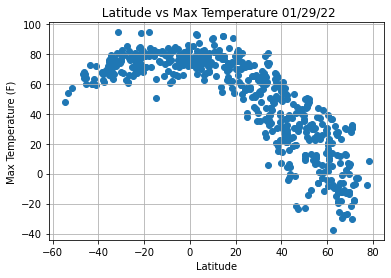

In [10]:
x_values=clean_city_weather_df['Lat']
y_values=clean_city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f' Latitude vs Max Temperature 01/29/22')
plt.grid()
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()

In [ ]:
#Analysis
#This plot is comparing the the maximum temperatures of the cities in relation to the latitude.

## Latitude vs. Humidity Plot

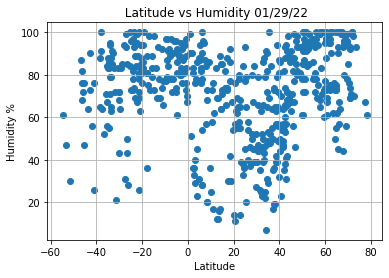

In [11]:
x_values=clean_city_weather_df['Lat']
y_values=clean_city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f' Latitude vs Humidity 01/29/22')
plt.grid()
plt.savefig("../output_data/lat_vs_hum.png")
plt.show()

In [ ]:
#Analysis
#This plot is comparing the the Humidity of the cities in relation to the latitude.

## Latitude vs. Cloudiness Plot

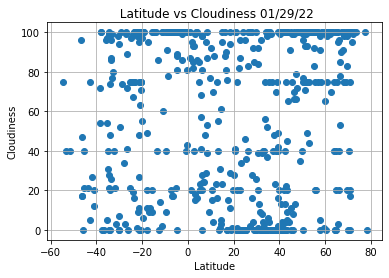

In [13]:
x_values=clean_city_weather_df['Lat']
y_values=clean_city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f' Latitude vs Cloudiness 01/29/22')
plt.grid()
plt.savefig("../output_data/lat_vs_cloud.png")
plt.show()

In [ ]:
#Analysis
#This plot is comparing the the cloudiness of the cities in relation to the latitude.

## Latitude vs. Wind Speed Plot

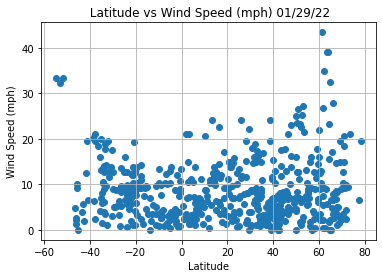

In [14]:
x_values=clean_city_weather_df['Lat']
y_values=clean_city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f' Latitude vs Wind Speed (mph) 01/29/22')
plt.grid()
plt.savefig("../output_data/lat_vs_wind.png")
plt.show()

In [ ]:
#Analysis
#This plot is comparing the the Wind Speeds(mph) of the cities in relation to the latitude.

## Linear Regression

In [15]:
weather_north_df=clean_city_weather_df.loc[clean_city_weather_df['Lat']>=0]
weather_south_df=clean_city_weather_df.loc[clean_city_weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

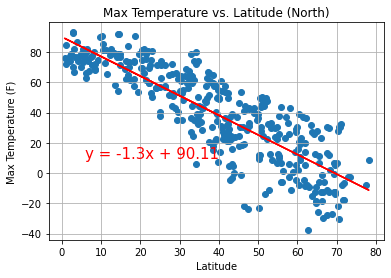

The rvalue is: -0.8468464681908586
The r squared is: 0.7171489406873309


In [28]:
x_values=weather_north_df['Lat']
y_values=weather_north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(6,10),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. Latitude (Northern)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')


# Analysis
# Since the |rvalue| of is >=0.7 and the value is negative, we can conclude that there is
# strong negative corrolation between the max_temps and latitudes in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

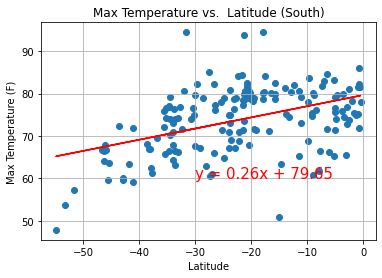

The rvalue is: 0.44569617786140053
The r squared is: 0.19864508296026118


In [33]:
x_values=weather_south_df['Lat']
y_values=weather_south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-30,60),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs.  Latitude (Southern)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')


# Analysis
# Since the |rvalue| of is between 0.3 and 0.5 and the value is positive, we can conclude that there is
# weak positive corrolation between the max_temps and latitudes in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

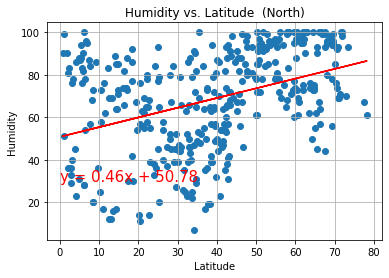

The rvalue is: 0.3897174671613554
The r squared is: 0.15187970421066213


In [26]:
x_values=weather_north_df['Lat']
y_values=weather_north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude  (Northern)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| of is between 0.3 and 0.5 and the value is positive, we can conclude that there is
# weak positive corrolation between the humidity and latitudes in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

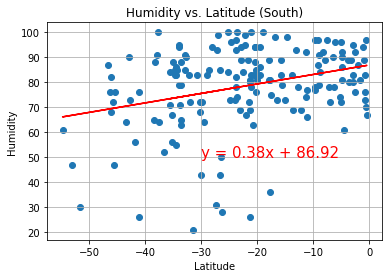

The rvalue is: 0.31093981249365227
The r squared is: 0.09668356699358763


In [32]:
x_values=weather_south_df['Lat']
y_values=weather_south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-30,50),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. Latitude (Southern)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| of is between 0.3 and 0.5 and the value is positive, we can conclude that there is
# weak positive corrolation between the humidity and latitudes in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

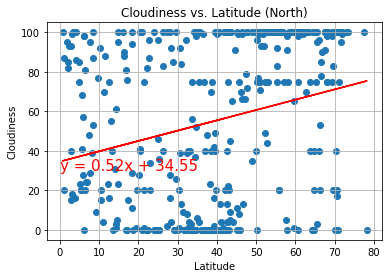

The rvalue is: 0.25390769419450415
The r squared is: 0.06446911717116983


In [34]:
x_values=weather_north_df['Lat']
y_values=weather_north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude (Northern)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| of is between 0.5 and 0.7 and the value is positive, we can conclude that there is
# moderate positive corrolation between the cloudiness and latitudes in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

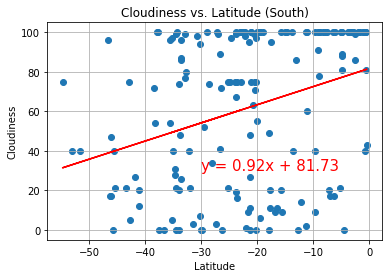

The rvalue is: 0.31880374186749777
The r squared is: 0.10163582582871815


In [36]:
x_values=weather_south_df['Lat']
y_values=weather_south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-30,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. Latitude (Southern)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| of is between 0.3 and 0.5 and the value is positive, we can conclude that there is
# weak positive corrolation between the cloudiness and latitudes in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

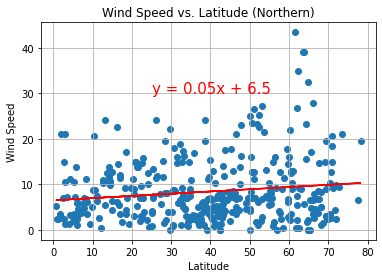

The rvalue is: 0.13824357020480454
The r squared is: 0.019111284702970723


In [41]:
x_values=weather_north_df['Lat']
y_values=weather_north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(25,30),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude (Northern)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| <0.3, we can conclude that there is
# no corrolation between the wind speeds and latitudes in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

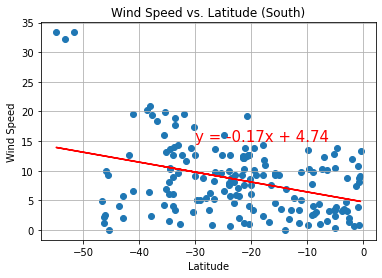

The rvalue is: -0.36687933114457
The r squared is: 0.13460044362108706


In [45]:
x_values=weather_south_df['Lat']
y_values=weather_south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-30,15),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. Latitude (Southern)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The rvalue is: {rvalue}')
print(f'The r squared is: {rvalue**2}')

# Analysis
# Since the |rvalue| of is between 0.3 and 0.5 and the value is negative, we can conclude that there is
# weak negative corrolation between the wind speeds and latitudes in the southern hemisphere